In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os 
import scipy.stats as sts

In [3]:
#Import your data into a Pandas DataFrame
ride_data_df = pd.read_csv(os.path.join("Resources","ride_data.csv"))
city_data_df = pd.read_csv(os.path.join("Resources", "city_data.csv"))

In [4]:
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data_df.head(5) 

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
#Merge your DataFrames.
ride_city_merged = pd.merge(ride_data_df, city_data_df , on = ["city","city"] )
ride_city_merged.head(5)



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [7]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
urban_cities_df = ride_city_merged[ride_city_merged["type"]== "Urban"]
suburban_cities_df = ride_city_merged[ride_city_merged["type"]== "Suburban"]
rural_cities_df = ride_city_merged[ride_city_merged["type"]== "Rural"]

In [9]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [10]:
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head(5)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [11]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

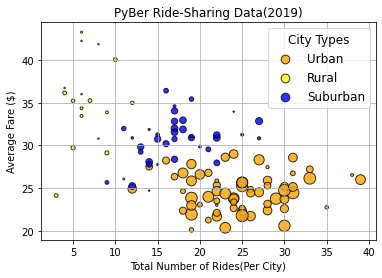

In [12]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s = urban_driver_count * 2, 
            color = "orange", label = "Urban",
            edgecolor="black", linewidths=1,
            alpha=0.8)
plt.scatter(rural_ride_count, rural_avg_fare, 
            s = rural_driver_count * 2, 
            color = "Yellow", label = "Rural",
            edgecolor="black", linewidths=1,
            alpha=0.8)
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = suburban_driver_count * 2, 
            color = "Blue", label = "Suburban",
            edgecolor="black", linewidths=1,
            alpha=0.8 )
plt.grid()
plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig("analysis/Fig1.png")
plt.show()

In [13]:
sts.mode(urban_fares)

NameError: name 'urban_fares' is not defined

In [14]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [16]:
urban_drivers = urban_cities_df['driver_count']
urban_drivers


0        5
1        5
2        5
3        5
4        5
        ..
1620    57
1621    57
1622    57
1623    57
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [17]:
urban_fares = urban_cities_df["fare"]
urban_fares.head(5)

0    13.83
1    31.25
2    19.89
3    24.28
4    13.89
Name: fare, dtype: float64

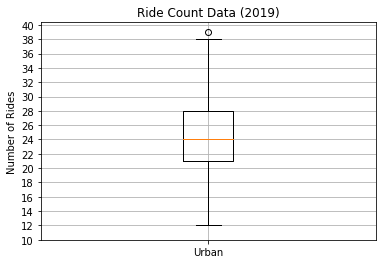

In [18]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

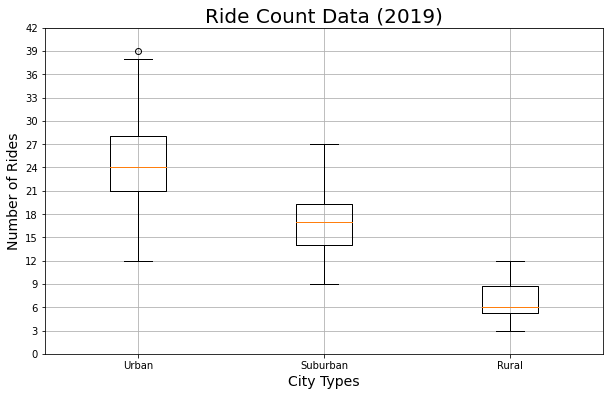

In [19]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

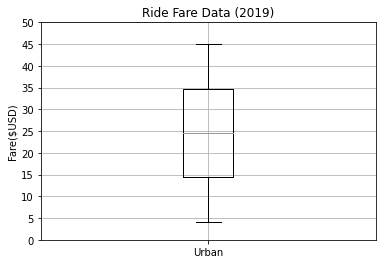

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [20]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

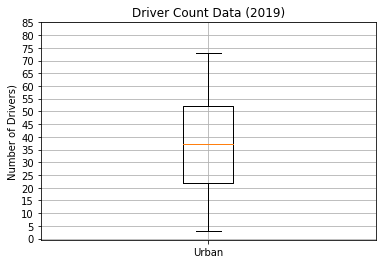

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [21]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [46]:
ride_city_merged.head(5)
fare_type_df= ride_city_merged.groupby("type")[["fare"]].sum()
total = fare_type_df.sum()["fare"]
fare_type_df["percentage"] = (fare_type_df["fare"] / total)*100
fare_type_df

,fare,percentage
type,,
Rural,4327.93,6.811493
Suburban,19356.33,30.463872
Urban,39854.38,62.724635


<function matplotlib.pyplot.show(close=None, block=None)>

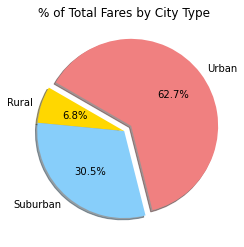

In [73]:
plt.pie(fare_type_df["percentage"],
        labels = ["Rural", "Suburban", "Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct = '%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show